In [51]:
#20BEC1131
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**TASK 1**

In [52]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [53]:
#creating dataframe and reading the contents of csv file
#the dataset taken is the train.csv
dat1 = pd.read_csv('/content/drive/MyDrive/DAC/titanic_train.csv')
dat1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**TASK 2**

In [54]:
#Removing all the NULL values from the dataset
dat2 = dat1.dropna()
dat2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [55]:
dat2.info() #shows that dat2 has no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


**TASK 3**

In [56]:
#removing Name and PassengerId column
dat3 = dat2.drop(columns = ["Name", "PassengerId"])
dat3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


**TASK 4**

In [57]:
#doing a 80:20 split in the dataset using loc and iloc
splitval = round(183*0.8) + 1 
dat_80, dat_20 = dat3.iloc[:splitval,:], dat3.iloc[splitval:184,:]
dat_80.info()
print("\n")
dat_20.info()
#dat_80 has 80% content of data by number of rows and dat_20 has 20%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 710
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  147 non-null    int64  
 1   Pclass    147 non-null    int64  
 2   Sex       147 non-null    object 
 3   Age       147 non-null    float64
 4   SibSp     147 non-null    int64  
 5   Parch     147 non-null    int64  
 6   Ticket    147 non-null    object 
 7   Fare      147 non-null    float64
 8   Cabin     147 non-null    object 
 9   Embarked  147 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 12.6+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 712 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  36 non-null     int64  
 1   Pclass    36 non-null     int64  
 2   Sex       36 non-null     object 
 3   Age       36 non-null     float64
 4   SibSp     36 non-

**TASK 5**

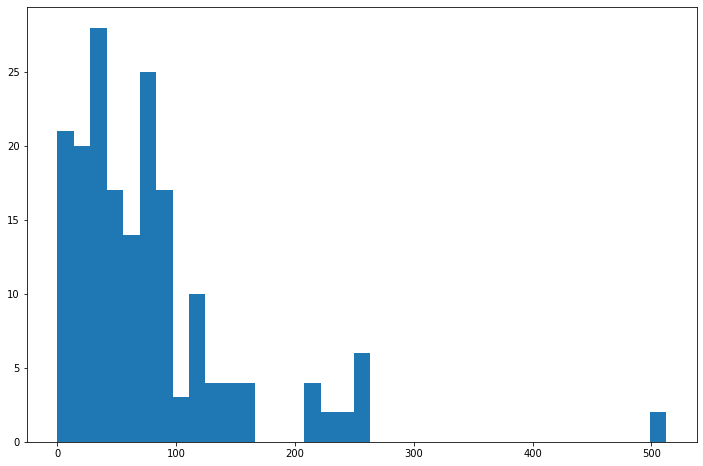

In [58]:
#plotting histogram for Fare and Age columns of dat3 dataset
farebin = ((dat3['Fare'].max() - dat3['Fare'].min())/14)
#formula for determining bin width ^
fig1, ax1 = plt.subplots(figsize = (12, 8))
ax1.hist(dat3['Fare'], bins = round(farebin))
plt.show()

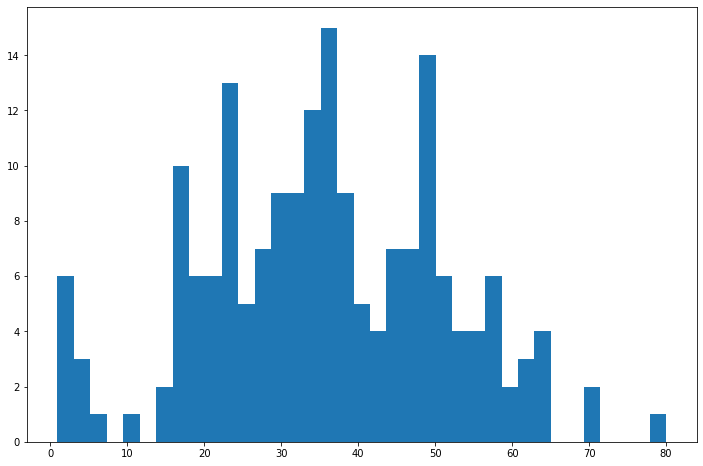

In [59]:
#similar process for Age as done for Fare above
agebin = ((dat3['Age'].max() - dat3['Age'].min())/8)
fig2, ax2 = plt.subplots(figsize = (12, 8))
ax2.hist(dat3['Age'], bins = round(farebin))
plt.show()

**TASK 6**

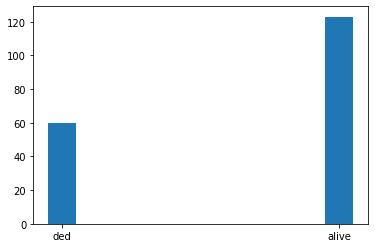

In [60]:
#Plotting bar chart for all binary columns
#we know from inspection that Survived and Sex are binary columns (0-1 and M-F)

#we make 2 arrays containing the number of entries for each binary value
#and we use length to find y axis values
alive = [x for x in dat3['Survived'] if x==1]
ded = [x for x in dat3['Survived'] if x==0]

#xval1 are x axis values, similarly yval1 are y axis values
xval1 = [alive[0], ded[0]]
yval1 = [len(alive), len(ded)]
bar1 = plt.bar(xval1, yval1, width=0.1, tick_label = ['alive','ded'])

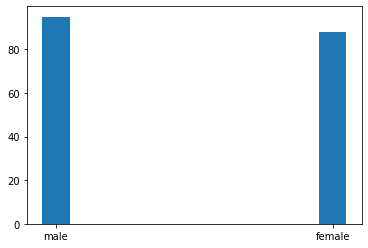

In [61]:
#the procedure below is same as that done above except its for male and female
male = [x for x in dat3['Sex'] if x=='male']
female = [x for x in dat3['Sex'] if x=='female']
xval2 = [male[0], female[0]]
yval2 = [len(male), len(female)]
bar2 = plt.bar(xval2, yval2, width=0.1, tick_label = ['male','female'])